In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#### Model 1 with drop rate 0.3

In [0]:
model1= Sequential()
model1.add(Conv2D(25, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same'))
model1.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
model1.add(Conv2D(100, (3, 3), activation='relu',padding='same'))
model1.add(Dropout(0.3))
model1.add(MaxPooling2D(pool_size=(4, 4)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 25)        250       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 50)        11300     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 100)       45100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)  

In [0]:
history=model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 28s 461us/step - loss: 0.0958 - acc: 0.9734 - val_loss: 0.0530 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 21s 357us/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0580 - val_acc: 0.9823
Epoch 3/12
60000/60000 [==============================] - 21s 353us/step - loss: 0.0261 - acc: 0.9920 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0186 - acc: 0.9947 - val_loss: 0.0263 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 21s 349us/step - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0434 - val_acc: 0.9868
Epoch 6/12
60000/60000 [==============================] - 21s 349us/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0308 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 21s 349us/

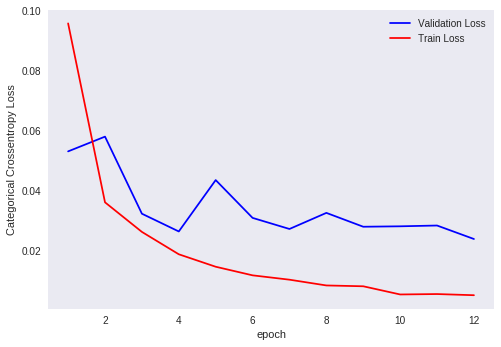

In [0]:
import matplotlib.pyplot as plt
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 1 with drop rate 0.5

In [0]:
model1= Sequential()
model1.add(Conv2D(25, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same'))
model1.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
model1.add(Conv2D(100, (3, 3), activation='relu',padding='same'))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D(pool_size=(4, 4)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 25)        250       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 50)        11300     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 100)       45100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               490100    
__________

In [0]:
history=model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.1035 - acc: 0.9706 - val_loss: 0.1055 - val_acc: 0.9788
Epoch 2/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0392 - acc: 0.9880 - val_loss: 0.0678 - val_acc: 0.9832
Epoch 3/12
60000/60000 [==============================] - 21s 350us/step - loss: 0.0284 - acc: 0.9918 - val_loss: 0.0767 - val_acc: 0.9825
Epoch 4/12
60000/60000 [==============================] - 21s 353us/step - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0564 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0745 - val_acc: 0.9788
Epoch 6/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0503 - val_acc: 0.9862
Epoch 7/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.

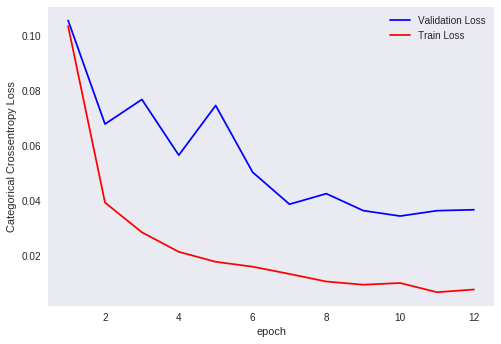

In [0]:
import matplotlib.pyplot as plt
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 1 with drop rate 0.9

In [0]:
model1= Sequential()
model1.add(Conv2D(25, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same'))
model1.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
model1.add(Conv2D(100, (3, 3), activation='relu',padding='same'))
model1.add(Dropout(0.9))
model1.add(MaxPooling2D(pool_size=(4, 4)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 25)        250       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 50)        11300     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 100)       45100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               490100    
__________

In [0]:
history=model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.1421 - acc: 0.9582 - val_loss: 1.3665 - val_acc: 0.4419
Epoch 2/12
60000/60000 [==============================] - 22s 363us/step - loss: 0.0555 - acc: 0.9832 - val_loss: 1.5451 - val_acc: 0.3344
Epoch 3/12
60000/60000 [==============================] - 22s 362us/step - loss: 0.0433 - acc: 0.9863 - val_loss: 1.4210 - val_acc: 0.3085
Epoch 4/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.0375 - acc: 0.9884 - val_loss: 1.2520 - val_acc: 0.3363
Epoch 5/12
60000/60000 [==============================] - 22s 362us/step - loss: 0.0311 - acc: 0.9901 - val_loss: 1.3883 - val_acc: 0.2992
Epoch 6/12
60000/60000 [==============================] - 22s 365us/step - loss: 0.0279 - acc: 0.9914 - val_loss: 1.1210 - val_acc: 0.4031
Epoch 7/12
60000/60000 [==============================] - 22s 362us/step - loss: 0.0261 - acc: 0.9917 - val_loss: 1.

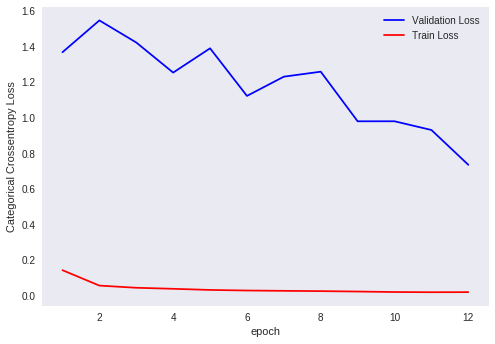

In [0]:
import matplotlib.pyplot as plt
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 2 with drop rate 0.3

In [0]:
model2= Sequential()
model2.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model2.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model2.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model2.add(Dropout(0.3))
model2.add(Conv2D(200, (7, 7), activation='relu'))
model2.add(MaxPooling2D(pool_size=(8, 8)))
model2.add(Flatten())
model2.add(Dense(150, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 200)       1470200   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 200)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
__________

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0880 - acc: 0.9756 - val_loss: 0.0692 - val_acc: 0.9777
Epoch 2/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0300 - acc: 0.9910 - val_loss: 0.0562 - val_acc: 0.9821
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0231 - acc: 0.9930 - val_loss: 0.0534 - val_acc: 0.9832
Epoch 4/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0179 - acc: 0.9948 - val_loss: 0.0351 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0610 - val_acc: 0.9808
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0263 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0115 - acc: 0.9965 - val_loss: 0.0197 - val_acc

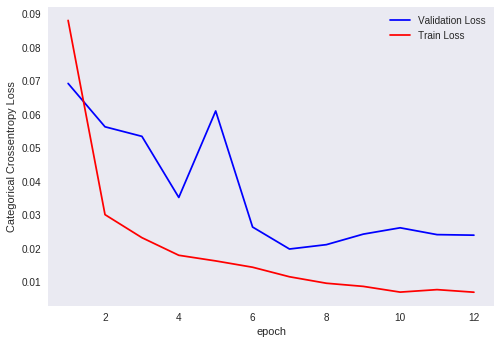

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 2 with drop rate 0.5

In [0]:
model2= Sequential()
model2.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model2.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model2.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model2.add(Dropout(0.5))
model2.add(Conv2D(200, (7, 7), activation='relu'))
model2.add(MaxPooling2D(pool_size=(8, 8)))
model2.add(Flatten())
model2.add(Dense(150, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 200)       1470200   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 200)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
__________

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0977 - acc: 0.9742 - val_loss: 0.0465 - val_acc: 0.9859
Epoch 2/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0338 - acc: 0.9899 - val_loss: 0.0339 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0251 - acc: 0.9928 - val_loss: 0.0277 - val_acc: 0.9911
Epoch 4/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0208 - acc: 0.9938 - val_loss: 0.0276 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0520 - val_acc: 0.9829
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0145 - acc: 0.9956 - val_loss: 0.0223 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0139 - acc: 0.9958 - val_loss: 0.0325 - val_acc

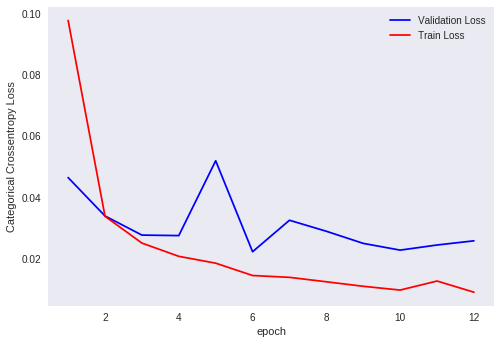

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 2 with drop rate 0.9

In [0]:
model2= Sequential()
model2.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model2.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model2.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model2.add(Dropout(0.9))
model2.add(Conv2D(200, (7, 7), activation='relu'))
model2.add(MaxPooling2D(pool_size=(8, 8)))
model2.add(Flatten())
model2.add(Dense(150, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 200)       1470200   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 200)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
__________

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1837 - acc: 0.9459 - val_loss: 0.1278 - val_acc: 0.9649
Epoch 2/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0523 - acc: 0.9847 - val_loss: 0.1836 - val_acc: 0.9442
Epoch 3/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0409 - acc: 0.9879 - val_loss: 0.0845 - val_acc: 0.9758
Epoch 4/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0349 - acc: 0.9893 - val_loss: 0.1161 - val_acc: 0.9645
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0301 - acc: 0.9906 - val_loss: 0.1549 - val_acc: 0.9558
Epoch 6/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0288 - acc: 0.9910 - val_loss: 0.1477 - val_acc: 0.9502
Epoch 7/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.2808 - val_acc

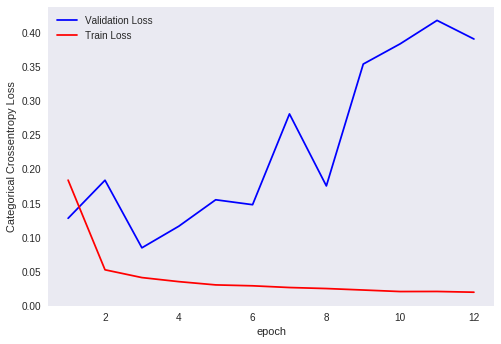

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 3 with drop rate 0.5

In [0]:
model3= Sequential()
model3.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model3.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(Conv2D(250, (3, 3),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(300, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(150, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.3))
model3.add(Dense(75, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 200)       750200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 250)         450250    
__________

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2017 - acc: 0.9405 - val_loss: 0.0867 - val_acc: 0.9730
Epoch 2/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0518 - acc: 0.9851 - val_loss: 0.0659 - val_acc: 0.9790
Epoch 3/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.0347 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0319 - acc: 0.9904 - val_loss: 0.0383 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0276 - acc: 0.9917 - val_loss: 0.0190 - val_acc: 0.9941
Epoch 6/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0300 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0207 - acc: 0.9938 - val_loss: 0.0283 - val_acc

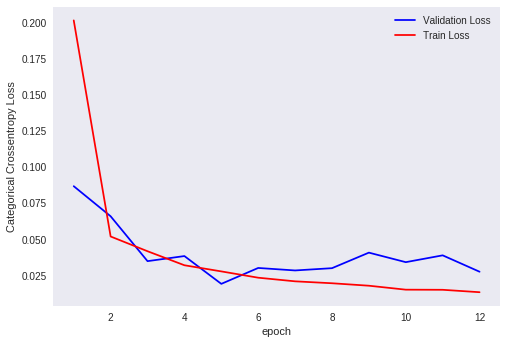

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 3 with drop rate 0.3

In [0]:
model3= Sequential()
model3.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model3.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model3.add(Dropout(0.5))
model3.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(Conv2D(250, (3, 3),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(300, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(150, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(75, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 200)       750200    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 250)         450250    
__________

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2711 - acc: 0.9214 - val_loss: 0.1396 - val_acc: 0.9578
Epoch 2/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0661 - acc: 0.9819 - val_loss: 0.0451 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0484 - acc: 0.9858 - val_loss: 0.0393 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0400 - acc: 0.9880 - val_loss: 0.0485 - val_acc: 0.9853
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0353 - acc: 0.9900 - val_loss: 0.0542 - val_acc: 0.9828
Epoch 6/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0312 - acc: 0.9907 - val_loss: 0.0279 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0275 - acc: 0.9920 - val_loss: 0.0277 - val_acc

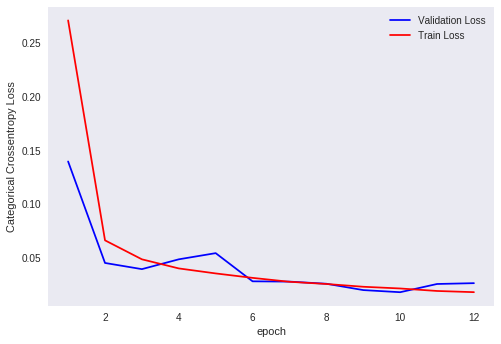

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Model 3 with drop rate 0.9

In [0]:
model3= Sequential()
model3.add(Conv2D(50, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
model3.add(Conv2D(150, (5, 5), activation='relu',padding='same'))
model3.add(Dropout(0.9))
model3.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(Conv2D(250, (3, 3),activation='relu',input_shape=input_shape,padding='same'))
model3.add(Conv2D(300, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(150, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(75, activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 100)       125100    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
dropout_11 (Dropout)         (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 200)       750200    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 250)         450250    
__________

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3579 - acc: 0.8907 - val_loss: 5.9545 - val_acc: 0.2892
Epoch 2/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1014 - acc: 0.9701 - val_loss: 6.1427 - val_acc: 0.2752
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0719 - acc: 0.9793 - val_loss: 5.3559 - val_acc: 0.2638
Epoch 4/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0590 - acc: 0.9826 - val_loss: 2.8091 - val_acc: 0.4592
Epoch 5/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0518 - acc: 0.9848 - val_loss: 0.8636 - val_acc: 0.7235
Epoch 6/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0454 - acc: 0.9867 - val_loss: 1.8887 - val_acc: 0.5702
Epoch 7/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0403 - acc: 0.9882 - val_loss: 2.4166 - val_acc

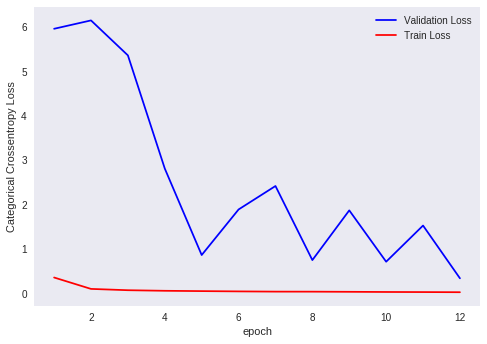

In [0]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

#### Observations

##### Performance comparision 

###### model1

In [3]:
from prettytable import PrettyTable
model1_table= PrettyTable()
model1_table.field_names = ["Model",'Drop out rate',"Test accuracy score"]
model1_table.add_row(["Model1",'0.3',0.9929])
model1_table.add_row(["Model1",'0.5',0.9891])
model1_table.add_row(["Model1",'0.9',0.7335])
print(model1_table)

+--------+---------------+---------------------+
| Model  | Drop out rate | Test accuracy score |
+--------+---------------+---------------------+
| Model1 |      0.3      |        0.9929       |
| Model1 |      0.5      |        0.9891       |
| Model1 |      0.9      |        0.7335       |
+--------+---------------+---------------------+


It can be observed form the above tables that with drop out rate of 0.3 the model produces best score and with 0.5 as drop out rate the model produces slightly lower accuracy score but with  0.9 as the drop out rate the test accuracy decreases significently

###### model2

In [4]:
model2_table= PrettyTable()
model2_table.field_names = ["Model",'Drop out rate',"Test accuracy score"]
model2_table.add_row(["Model2",'0.3',0.9922])
model2_table.add_row(["Model2",'0.5',0.9923])
model2_table.add_row(["Model2",'0.9',0.9364])
print(model2_table)

+--------+---------------+---------------------+
| Model  | Drop out rate | Test accuracy score |
+--------+---------------+---------------------+
| Model2 |      0.3      |        0.9922       |
| Model2 |      0.5      |        0.9923       |
| Model2 |      0.9      |        0.9364       |
+--------+---------------+---------------------+


It can be observed form the above tables that with drop out rate of 0.3 and 0.5 the model produces similar results but with  0.9 as the drop out rate the test accuracy decreases considerably 

###### model 3

In [5]:
model3_table= PrettyTable()
model3_table.field_names = ["Model",'Drop out rate',"Test accuracy score"]
model3_table.add_row(["Model3",'0.3',0.9928])
model3_table.add_row(["Model3",'0.5',0.9924])
model3_table.add_row(["Model3",'0.9',0.9001])
print(model3_table)

+--------+---------------+---------------------+
| Model  | Drop out rate | Test accuracy score |
+--------+---------------+---------------------+
| Model3 |      0.3      |        0.9928       |
| Model3 |      0.5      |        0.9924       |
| Model3 |      0.9      |        0.9001       |
+--------+---------------+---------------------+


It can be observed form the above tables that with drop out rate of 0.3 and 0.5 the model produces similar results but with  0.9 as the drop out rate the test accuracy decreases considerably 